In [1]:
from keras.datasets import imdb
import numpy as np

Using TensorFlow backend.


# Example 1. simple classification

In [2]:
# Load data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [15]:
# data preperation
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [52]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [53]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [18]:
# build network
# output = relu(dot(W, input) + b)
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# loss function & optimizer
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])


In [19]:
# Validating

In [42]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [47]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_date=(x_val,y_val))

TypeError: Unrecognized keyword arguments: {'validation_date': (array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.]], dtype=float32), array([1., 0., 0., ..., 1., 0., 0.], dtype=float32))}

In [ ]:
# the result is an object
history_dict = history.history
history_dict.keys()

In [ ]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Plotting the training and validation accuracy
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# peak at epoch 4 of the validation set, retraining:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

# >>> results
# [0.2929924130630493, 0.88327999999999995]

In [ ]:
#use the optimized network to predict:
model.predict(x_test)

# multiclass classification

In [57]:
# import dataset # single label, total 46 different topics
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2113536/2110848 [==============================] - 3s 2us/step


In [59]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

557056/550378 [==============================] - 1s 1us/step


In [60]:
# decode sample
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [72]:
# Preparing the data - vectorize x data
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [76]:
train_data.shape

(8982,)

In [84]:
# vectorize y (label)
def to_one_hot(labels, dimension=46):    
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
# there is a built-in way to do this in Keras
# from keras.utils.np_utils import to_categorical
# one_hot_train_labels = to_categorical(train_labels)
# one_hot_test_labels = to_categorical(test_labels)

In [85]:
# modeling
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))  
# softmax: output a probability distribution over the 46 different output classes

In [86]:
# compile model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [88]:
# Validating this approach
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [89]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 541us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7204 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 2s 268us/step - loss: 1.4450 - acc: 0.6878 - val_loss: 1.3457 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 2s 244us/step - loss: 1.0951 - acc: 0.7648 - val_loss: 1.1704 - val_acc: 0.7420
Epoch 4/20
7982/7982 [==============================] - 2s 217us/step - loss: 0.8695 - acc: 0.8161 - val_loss: 1.0795 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 2s 198us/step - loss: 0.7032 - acc: 0.8480 - val_loss: 0.9846 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 2s 248us/step - loss: 0.5665 - acc: 0.8795 - val_loss: 0.9409 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 3s 344us/step - loss: 0.4580 - a

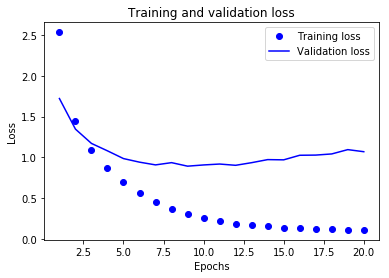

In [91]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt
%matplotlib inline
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

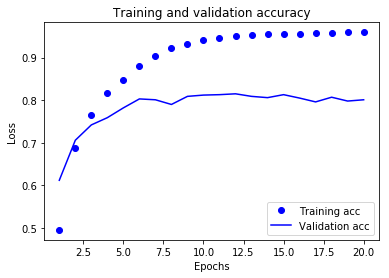

In [92]:
# Plotting the training and validation accuracy
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [93]:
# Retraining a model from scratch
# Categorical crossentropy is almost always the loss function you should use for such problems.
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 4s 517us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 2s 243us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 2s 268us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 2s 244us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 2s 202us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 2s 228us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 2s 195us/step - loss: 0.4124 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8

In [95]:
results

[1.0224982713442876, 0.7756010686194165]

In [98]:
#Generating predictions for new data
predictions = model.predict(x_test)

In [101]:
np.argmax(predictions[0])

3

In [108]:
# question1: if use labels:  y_train = np.array(train_labels), need to change loss function
# model.compile(optimizer='rmsprop',
# loss='sparse_categorical_crossentropy',
# metrics=['acc'])

In [109]:
# question2: because the final outputs are 46-dimensional, you should
# avoid intermediate layers with many fewer than 46 hidden units which will lower accuracy

# a regression example

In [113]:
from keras.datasets import boston_housing

In [114]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 4us/step


In [137]:
# Normalizing the data
# subtract the mean of the feature and divide by the standard deviation, so that the feature is
# centered around 0 and has a unit standard deviation. 
# ** mean & std are calculated by train data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [140]:
# modeling
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [141]:
# K-fold validation for small dataset
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
        epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [142]:
all_scores

[2.0846090977734857, 2.26431933960112, 2.923042823772619, 2.3304319664983466]

In [143]:
np.mean(all_scores)

2.400600806911393

In [146]:
# train in 500 epochs and Saving the validation logs at each fold
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [147]:
# Building the history of successive mean K-fold validation scores
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

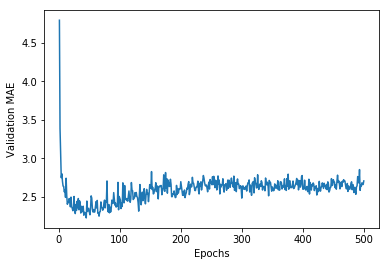

In [148]:
# Plotting validation scores
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

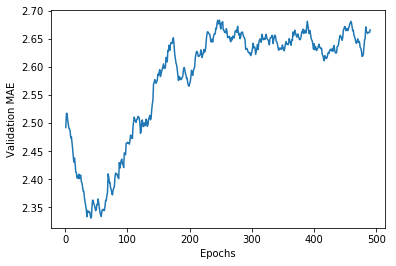

In [149]:
# Plotting validation scores, excluding the first 10 data points
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [150]:
# Training the final model
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 2ms/step


In [151]:
test_mae_score

2.6885303329018986

In [152]:
# When little training data is available, it’s preferable to use a small network with
# few hidden layers (typically only one or two), in order to avoid severe overfitting.

# General Rule

Problem type                        Last-layer activation      Loss function
Binary classification                        sigmoid        binary_crossentropy
Multiclass,single-label classification       softmax        categorical_crossentropy
Multiclass, multilabel classification        sigmoid        binary_crossentropy
Regression to arbitrary values               None           mse
Regression to values between 0 and 1         sigmoid        mse or binary_crossentropy

CNN, RNN, LSTM for different problems